In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats

In [2]:
# Separamos los datos de la tabla en x, y y error
fit = np.load('fit_exercise.npy')
x = fit[0]
y = fit[1]
e = fit[2]

<ErrorbarContainer object of 3 artists>

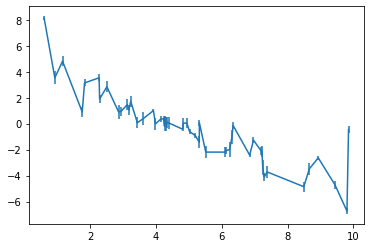

In [3]:
# Visualizamos los datos
plt.errorbar(x, y, e) 

In [4]:
# Asignamos variables que utilizaremos para el método de Regresión Lineal
n = len(x)
sumx = sum(x)
sumy = sum(y)
sume = sum(e)/n
# Sumas de multiplicaciones
xy = sum(x*y)
xx = sum(x*x)
# Ecuación para la pendiente
m = (sumx*sumy - n*xy)   /   ((sumx**2)-n*xx)
b = (sumx*xy - sumy*xx)   /   ((sumx**2)-n*xx)
# Errores de pendiente m e interseccion b
Dm = np.sqrt(   (n*(sume**2))   /   (n*xx-(sumx**2))   )
Db = np.sqrt(   ((sume**2)*xx)   /   (n*xx-(sumx**2))   )


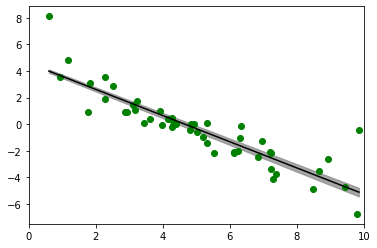

In [5]:
plt.plot(x, y, 'og')
plt.plot(x, m*x+b, '-', color='k')
#Fit obtenido y error del fit obtenido
fit_O = m*x + b
E_fit_O = Dm*x + Db
plt.fill_between(x, fit_O - E_fit_O, fit_O + E_fit_O,
                 color='grey', alpha=0.7)
plt.xlim(0, 10);

In [6]:
# Utilizamos scipy para comparar los valores encontrados
pend, inter, r, p, std_e= sp.stats.linregress(x, y)
print("pendiente: %f    interseccion: %f" % (pend, inter))

pendiente: -0.982162    interseccion: 4.577859


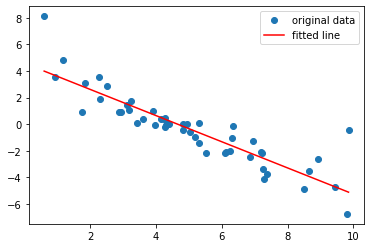

In [7]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, inter + pend*x, 'r', label='fitted line')
plt.legend()
plt.show()

In [8]:
# Resultado de la diferencia entre ambas implementaciones del método de Regresión Lineal
diff_m = m-pend
diff_b = b-inter
print("diferencia en pendiente:",diff_m,"diferencia en interseccion:",diff_b)


diferencia en pendiente: -2.886579864025407e-15 diferencia en interseccion: 1.509903313490213e-14
